
# Perlego Data Analysis Assessment 
This Jupyter Notebook contains all the code and visualisations for my data analysis task.

---
This notebook is split into 5 sections:
1. Section 1 : Contains general visualisations  about the dataset
2. Section 2 : Contains analysis based on Student and Professional user types in the dataset 
3. Section 3 : Contains analysis based on the subscriptions and seeing of there is any seasonality or trend
4. Section 4 : Key Performance Indicators
5. TODO: Any extra analysis or improvements I could have made on this dataset

There is a summary of my findings the end of each section

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the data into a dataframe and creating a copy to work with
data = pd.read_excel("Data Analysis Task Data Set.xlsx")
datacp = data.copy()

In [4]:
#Changing the format of the subscription columns to datetime format
datacp['subscription start date'] =  pd.to_datetime(datacp['subscription start date'], format='%Y-%m-%d',utc=True)
#removing none values to change to a datetime object
datacp['subscription_end_date'].replace('none', np.nan, inplace=True)
datacp['subscription_end_date'] =  pd.to_datetime(datacp['subscription_end_date'],format='%Y-%m-%d %H:%M:%S')

In [3]:
datacp.head()

,user_id,country,trial start (adjusted timezone),trial end (adjusted time zone),subscription start date,subscription_end_date,account status,UTM_Source,UTM_Medium,user_group,user_type,subjects_of_interest,university,books read
0,e4bdd9c4-a999-42bc-b962-0af7af6a01ff,United States,2020-08-19 14:38:27,2020-09-02 14:38:27,NaN,NaN,Lead,google,organic,Trial,Professional,Personal Development,NaN,1
1,bb0d7668-8ce1-4829-abb7-c5a1a7ab9479,United Kingdom,2020-08-04 13:53:33,2020-08-18 13:53:33,NaN,NaN,Lead,google,organic,Trial,Student,"History, Literature, Media & Performing Arts, ...",Not specified,2
2,85bfb360-787b-4ec4-b487-b7f93e63a9c6,United Kingdom,2020-08-19 14:57:57,2020-09-02 14:57:57,NaN,NaN,Lead,direct,direct,Trial,Professional,"Architecture, Art, Business, Computer Science,...",NaN,1
3,1231aef6-0534-490e-a7f4-68c08ee99434,United Kingdom,2020-07-01 14:05:47,2020-07-15 14:05:47,2020-07-15 14:05:47 +0100,2020-07-15 13:05:47,Cancelled,ucas,partner,Subscriber,Student,Biological Sciences,Not specified,2
4,551d977a-6ad4-4885-89d0-1fbeb5fdbe80,Ireland,2020-08-19 15:07:31,2020-09-02 15:07:31,2020-09-02 15:07:31 +0100,none,Active,facebook,psocial,Subscriber,Student,"Art, Biological Sciences, Business, Computer S...",Bristol University,0


## Section 1 - 
## General Data Insights

This section contains some general visualisations about the dataset 

---

organic     4113
partner      895
direct       779
cpc          582
psocial      101
mmedia        26
offline       24
referral       1
Name: UTM_Medium, dtype: int64


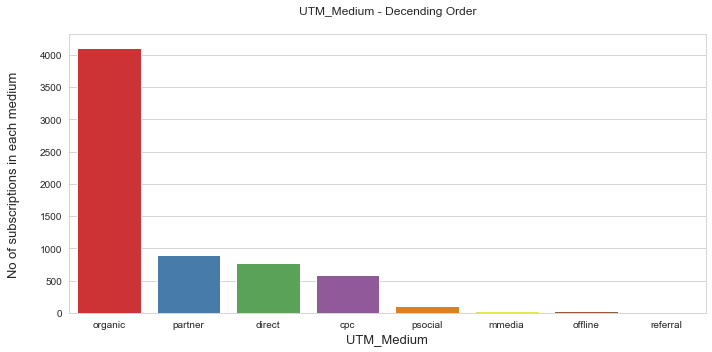

In [96]:
#No of subscriptions in each medium#
print(datacp['UTM_Medium'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(datacp['UTM_Medium'],order = datacp['UTM_Medium'].value_counts().index,palette="Set1")
plt.xlabel('UTM_Medium', fontsize=13)
plt.ylabel('No of subscriptions in each medium', fontsize=13,labelpad=20)
plt.title('UTM_Medium - Decending Order',pad=20)
plt.tight_layout()


---

Lead         4250
Cancelled    1192
Active       1140
Past due       19
Name: account status, dtype: int64


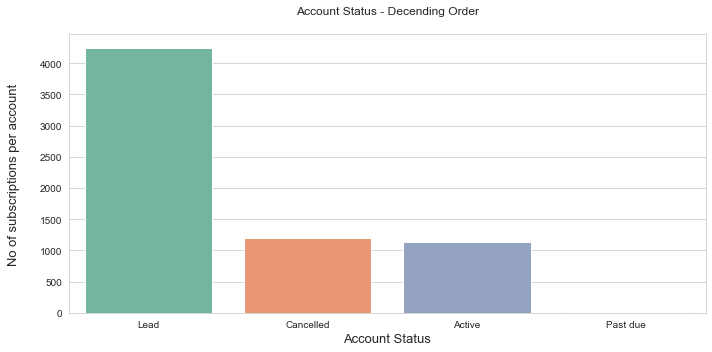

In [89]:
print(datacp['account status'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(datacp['account status'],palette="Set2",)
plt.xlabel('Account Status', fontsize=13)
plt.ylabel('No of subscriptions per account', fontsize=13,labelpad=20)
plt.title('Account Status - Decending Order',pad=20)
plt.tight_layout()

---

United Kingdom    3681
United States     2089
Italy              229
Canada             229
Australia          193
Ireland            180
Name: country, dtype: int64


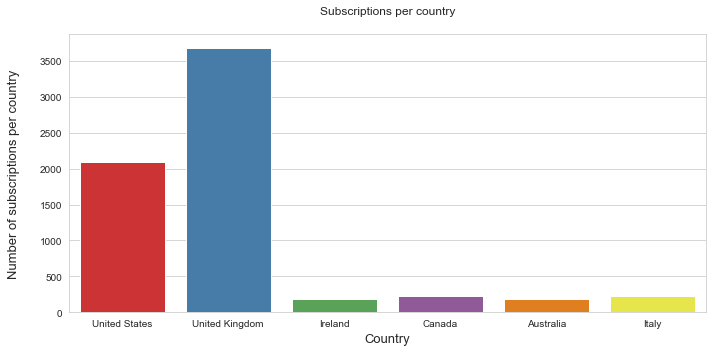

In [92]:
print(datacp['country'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(datacp['country'],palette="Set1")
plt.xlabel('Country', fontsize=13)
plt.ylabel('Number of subscriptions per country', fontsize=13,labelpad=20)
plt.title('Subscriptions per country',pad=20)
plt.tight_layout()

---

---
# Section 2 - 

# Students VS Professionals Analysis

In this section we try to understand how different or similar students and professionals who use the site are.
I have also provided visualisation to help understand this better 
*Please check the end of this section to see a summarisation of the analysis done.*


---

There are 6 main questions I try to answer in this section 
1. Which group reads more books? 
2. Which group has more active users?
3. Which group has more cancellations?
4. What are the top 5 most popular subjects of interest for each group?
5. Trial and Subscriber metrics for each group



In [21]:
#who reads more books, students vs professionals ratios.
student_count=len(datacp[datacp['user_type']=='Student'])
professionals_count=len(datacp[datacp['user_type']=='Professional'])

print('Total no of Students:',student_count)
print('Total no of Professionals:',professionals_count)
print('-'*25)
print('\n')

sr=datacp['books read'][datacp['user_type']=='Student']
student_books_count=sr.sum()

pr=datacp['books read'][datacp['user_type']=='Professional']
professionals_books_count=pr.sum()

print('Total no of books read by Students:',student_books_count)
print('Total no of books read by Professional:',professionals_books_count)
print('-'*25)
print('\n')


std_ratio=student_books_count/student_count
pro_ratio=professionals_books_count/professionals_count
print('Ratio of Students and books read by students:',std_ratio)
print('Ratio of Professional and books read by professionals:',pro_ratio)

Total no of Students: 5110
Total no of Professionals: 1491
-------------------------


Total no of books read by Students: 25127
Total no of books read by Professional: 7110
-------------------------


Ratio of Students and books read by students: 4.917221135029354
Ratio of Professional and books read by professionals: 4.768611670020121


In [7]:
#who has more active users, students vs professionals ratios.
student_count=len(datacp[datacp['user_type']=='Student'])
professionals_count=len(datacp[datacp['user_type']=='Professional'])

print('Total no of Students:',student_count)
print('Total no of Professionals:',professionals_count)
print('-'*25)
print('\n')

sa=datacp[datacp['account status']=='Active'][datacp['user_type']=='Student']
student_active_account=len(sa)

pa=datacp[datacp['account status']=='Active'][datacp['user_type']=='Professional']
professionals_active_account=len(pa)

print('Total no of active accounts by Students:',student_active_account)
print('Total no of active accounts by Professional:',professionals_active_account)
print('-'*25)
print('\n')

std_ratio=student_active_account/student_count
pro_ratio=professionals_active_account/professionals_count
print('Ratio of active accounts by Students',std_ratio)
print('Ratio of active accounts by Professional:',pro_ratio)


Total no of Students: 5110
Total no of Professionals: 1491
-------------------------


Total no of active accounts by Students: 913
Total no of active accounts by Professional: 227
-------------------------


Ratio of active accounts by Students 0.1786692759295499
Ratio of active accounts by Professional: 0.1522468142186452


In [8]:
#who cancelled more students vs pros
student_count=len(datacp[datacp['user_type']=='Student'])
professionals_count=len(datacp[datacp['user_type']=='Professional'])

print('Total no of Students:',student_count)
print('Total no of Professionals:',professionals_count)
print('-'*25)
print('\n')

sc=datacp[datacp['account status']=='Cancelled'][datacp['user_type']=='Student']
student_cancelled_account=len(sc)

pc=datacp[datacp['account status']=='Cancelled'][datacp['user_type']=='Professional']
professionals_cancelled_account=len(pc)

print('Total no of active accounts by Students:',student_cancelled_account)
print('Total no of active accounts by Professional:',professionals_cancelled_account)
print('-'*25)
print('\n')

std_ratio=student_cancelled_account/student_count
pro_ratio=professionals_cancelled_account/professionals_count
print('Ratio of cancelled accounts by Students',std_ratio)
print('Ratio of cancelled accounts by Professional:',pro_ratio)

Total no of Students: 5110
Total no of Professionals: 1491
-------------------------


Total no of active accounts by Students: 927
Total no of active accounts by Professional: 265
-------------------------


Ratio of cancelled accounts by Students 0.18140900195694717
Ratio of cancelled accounts by Professional: 0.17773306505700873


In [10]:
#Most popular subjects of interest -  students vs professionals can plot this 
datacp['interested_subjects']=datacp["subjects_of_interest"].str.split(',')
student_interests = datacp['interested_subjects'][datacp['user_type']=='Student']
professional_interests = datacp['interested_subjects'][datacp['user_type']=='Professional']
student_interests.dropna(inplace=True)
professional_interests.dropna(inplace=True)

In [29]:
ww=[]
for i in student_interests:
        ww.extend(i)
s=Counter(ww)
s.most_common(5)

[(' Social Sciences', 944),
 (' Psychology', 886),
 ('Business', 766),
 ('Art', 608),
 (' Personal Development', 602)]

In [30]:
gg=[]
for i in professional_interests:
        gg.extend(i)
p=Counter(gg)
p.most_common(5)

[(' Psychology', 220),
 (' Social Sciences', 199),
 (' Personal Development', 193),
 (' Philosophy', 175),
 (' Literature', 166)]

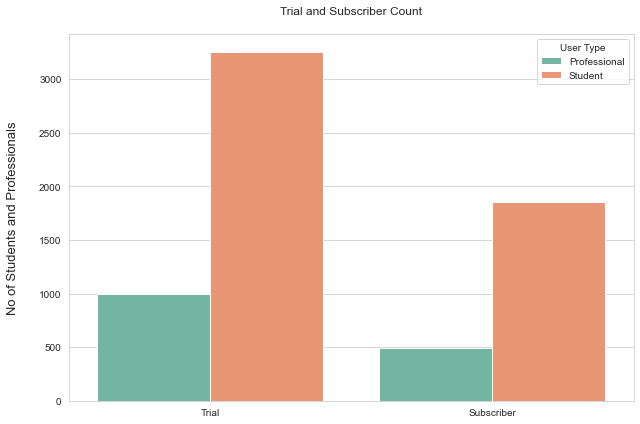

In [83]:
## Trial and Subscriber counts in the dataset 
#In the visualisation below we can see the split between trial users and subscribers .
#We can also see how this is divided in terms of Students and Professionals.

sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
sns.countplot(datacp['user_group'],hue=datacp['user_type'],palette='Set2')
plt.xlabel('', fontsize=18)
plt.ylabel('No of Students and Professionals', fontsize=13,labelpad=20)
plt.legend(title='User Type')
plt.title('Trial and Subscriber Count',pad=20)
plt.tight_layout()


In [20]:
## TODO 
## MOST COMMON UTM MEDUIM AND SOURCE FOR THAT MEDIUM FOR EACH STUDENT AND SUBSCRIBER

# Section 2 Summary -

Below are the answers to the questions proposed at the start of the section:
### Which group reads more books? 
> We have more number of students than professionals in this dataset . Therefore , we cannot just have a standard answer for this question. To get a comparable answer , I have compared the ratios to the number of students and the professionals and we can see the following data 

* *Ratio of Students and books read by students:     4.91*
* *Ratio of Professional and books read by professionals:   4.76*

---

### Which group has more active users?
> Similarly, we can only answer this question with percentages.

* Percentage of active accounts by students : 17.86%
* Percentage of active accounts by professionals : 15.22%

---

###  Which group has more cancellations?

* Percentage of cancelled accounts by students : 18.14%
* Percentage of cancelled  accounts by professionals : 17.77%
---

### What are the top 5 most popular subjects of interest for each group?

####  Students 
The top 5 most popular subjects of interests for students in order are:

1. Social Sciences
2. Psychology
3. Business
4. Art
5. Personal Development
---
#### Professionals
The top 5 most popular subjects of interests for professionals in order are:

1. Psychology
2. Social Sciences
3. Personal Development
4. Philosophy
5. Literature
---


### Trial and Subscriber metrics for each group
> From the barchart show above, we can see that there are more people who have a trial account than a subscriber account.
> The no of accounts for students for both cases are more than professional accounts. There are no anomalies in this visualisation 


---
# Section 3 -
# Subscriptions Analysis

In this section I try to answer the following question with regards to the subscriptions made by the users in this data set 

1. Average subscription time ( Number of Days ) for active users 
2. Average no of days users have used the site before cancellations 
3. Month at which the users have subscribed ( Checking to see of there is a tree or seasonality to this )
4. Which country has the most  subscriptions?  
 


In [32]:
#converting series to the correct datetime format
datacp['subscription start date'] =  pd.to_datetime(datacp['subscription start date'], format='%Y-%m-%d',utc=True)
#removing none values to change to a datetime object
datacp['subscription_end_date'].replace('none', np.nan, inplace=True)
datacp['subscription_end_date'] =  pd.to_datetime(datacp['subscription_end_date'],format='%Y-%m-%d %H:%M:%S',utc=True)
#days to cancellation
datacp['days_to_cancellation']=datacp['subscription_end_date']-datacp['subscription start date']

In [37]:
# adding the 'days_active' column to the dataframe 
# this is calculated using the today variable
today = pd.to_datetime('now').normalize()
today = pd.to_datetime(today,format='%Y-%m-%d %H:%M:%S',utc=True)
activedf = datacp[datacp['account status']=='Active']
activedf['subscription_end_date'] = today
datacp['days_active'] = activedf['subscription_end_date']-activedf['subscription start date']

In [40]:
# 1. Average subscription time ( Number of Days ) for active users
days = datacp['days_active'].astype(('timedelta64[D]'))
total_active_days=days.sum()
Average_active_days = total_active_days/len(datacp[datacp['account status']=='Active'])
print('Average subscription time for active users:',Average_active_days)

Average subscription time for active users: 184.89122807017543


In [41]:
# 2. Average no of days users have used the site before cancellations
can_days = datacp['days_to_cancellation'].astype(('timedelta64[D]'))
total_can_days=can_days.sum()
Average_can_days = total_can_days/len(datacp[datacp['account status']=='Cancelled'])
print('Average subscription time for cancelled users:',Average_can_days)

Average subscription time for cancelled users: 68.59312080536913


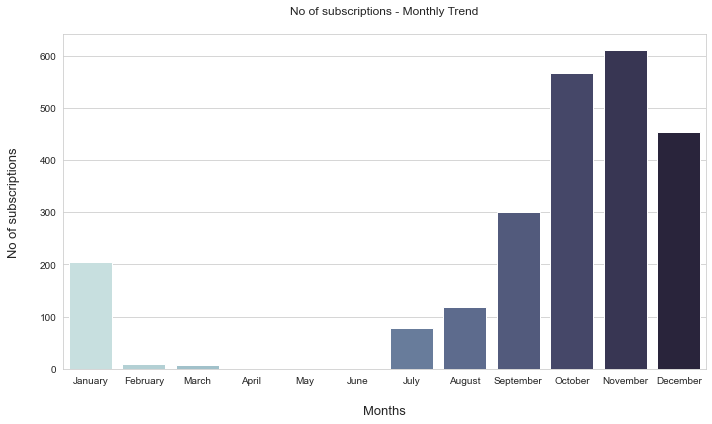

In [57]:
# 3. Month at which the users have subscribed ( Checking to see of there is a tree or seasonality to this )
datacp['start_Month'] = datacp['subscription start date'].dt.month_name()
order1=['January','February','March','April','May','June','July','August','September','October','November','December']
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
sns.countplot(datacp['start_Month'],palette=("ch:start=.2,rot=-.3"),order=order1)
plt.xlabel('Months', fontsize=13,labelpad=20)
plt.ylabel('No of subscriptions', fontsize=13,labelpad=20)
plt.title('No of subscriptions - Monthly Trend',pad=20)
plt.tight_layout()

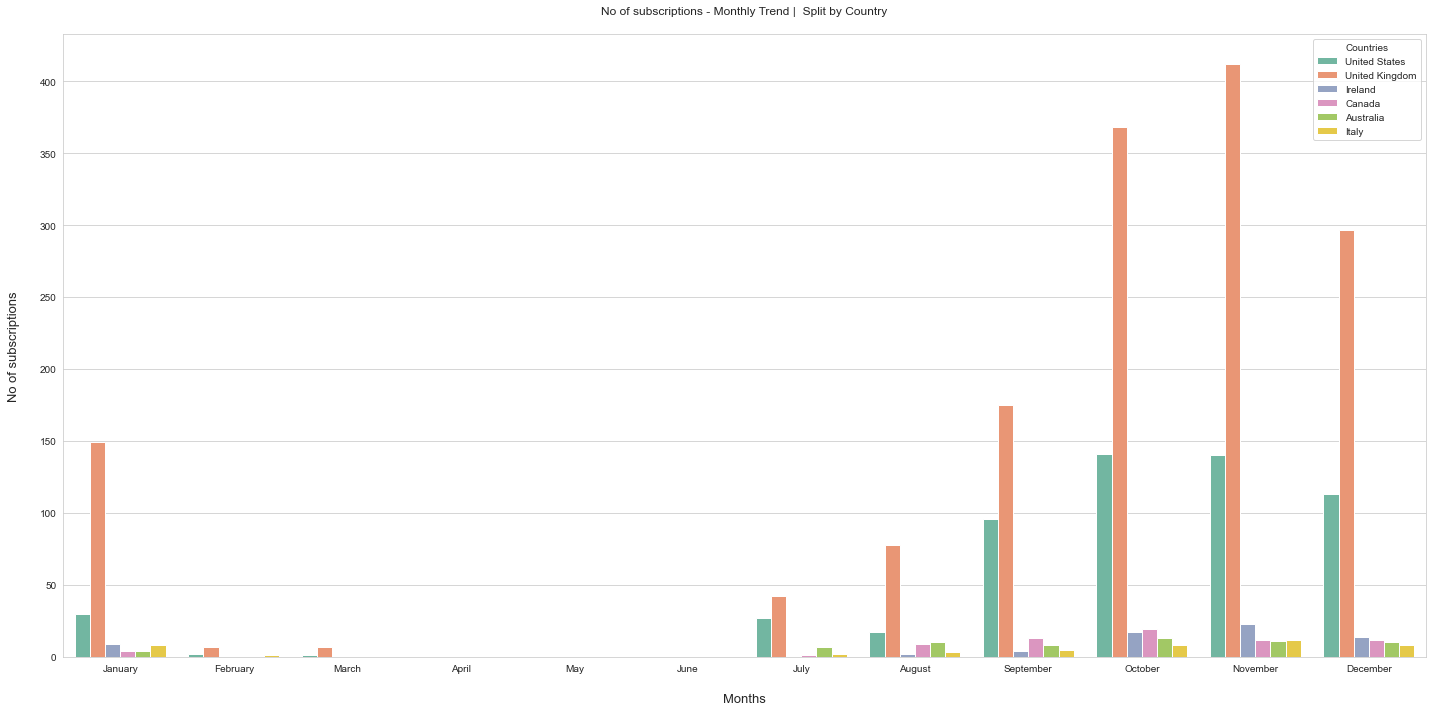

In [66]:
# 4.Which country has the most subscriptions?
plt.figure(figsize=(20,10))
sns.countplot(datacp['start_Month'],palette='Set2',order=order1,hue=datacp['country'])
plt.xlabel('Months', fontsize=13,labelpad=20)
plt.ylabel('No of subscriptions', fontsize=13,labelpad=20)
plt.title('No of subscriptions - Monthly Trend |  Split by Country',pad=20)
plt.legend(title='Countries')
plt.tight_layout()

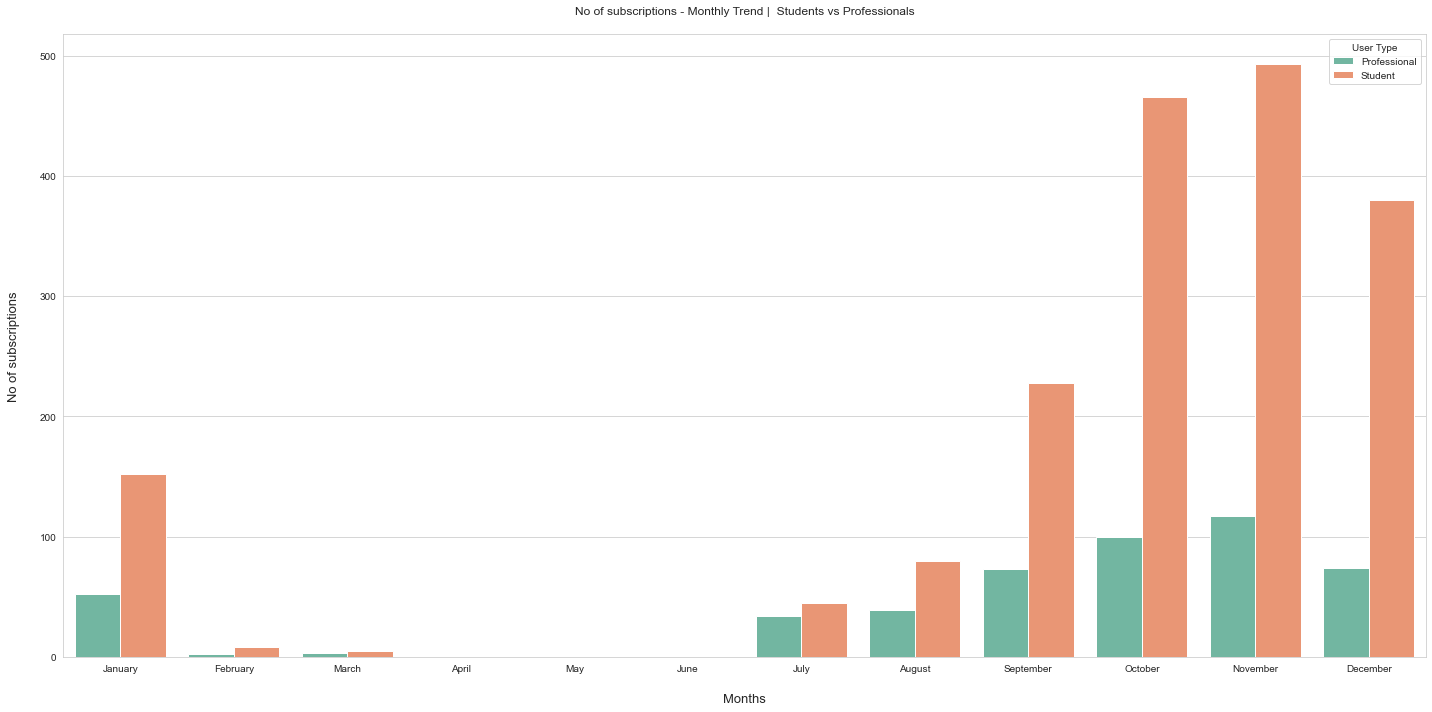

In [69]:
# 5.No of subscriptions - Monthly Trend |  Students vs Professionals
plt.figure(figsize=(20,10))
sns.countplot(datacp['start_Month'],palette='Set2',order=order1,hue=datacp['user_type'])
plt.xlabel('Months', fontsize=13,labelpad=20)
plt.ylabel('No of subscriptions', fontsize=13,labelpad=20)
plt.title('No of subscriptions - Monthly Trend |  Students vs Professionals',pad=20)
plt.legend(title='User Type')
plt.tight_layout()

## Section 3 Summary - 

Below are some of the answers to the questions proposed at the beginning of this section

---


### Average subscription time ( Number of Days ) for active users?
> The average subscription time for all users is *185 Days*


### Average no of days users have used the site before cancellations?
> The average no of days the subscription lasts before cancellation is 
> *69 days*

### Month at which the users have subscribed ( Checking to see of there is a tree or seasonality to this )?
> The months at which the users are subscribing are from *September - December*.
> There is an upward trend till Christmas and then a downward trend.
> There are almost no new subscriptions in the months from *April-june*

### Which country has the most subscriptions??
> The United Kingdom and USA have the most no of subscriptions every month .
> The other country fall behind with varying levels of performance in different months 

---

# Section 4 -
# Key Performance Indicators 
In this section of my analysis, I have focussed on a few KPI’s that could help the business make better decisions.

1. Conversion rate - How many people have actually become a subscriber?
2. Customer lifetime value -  Average no of days the user/subscriber has been active 
3. Customer retention rate -  How many no of users are active users?

---

In [71]:
##conversion rate total users
n_total = datacp.shape[0]
subscribers = len(datacp[datacp['user_group']=='Subscriber'])
conversion_rate=(subscribers/n_total)*100
print('Total conversion rate:',conversion_rate)

Total conversion rate: 35.61581578548705


In [72]:
#conversion rate student vs Professional
n_total = datacp.shape[0]
n_student_total = len(datacp[datacp['user_type']=='Student'])
students_subscribers = len(datacp[datacp['user_type']=='Student'][datacp['user_group']=='Subscriber'])
std_conversion_rate=(students_subscribers/n_student_total)*100
print('Student conversion rate:',std_conversion_rate)
print('-'*25)


n_total = datacp.shape[0]
n_pro_total = len(datacp[datacp['user_type']=='Professional'])
pro_subscribers = len(datacp[datacp['user_type']=='Professional'][datacp['user_group']=='Subscriber'])
pro_conversion_rate=(pro_subscribers/n_pro_total)*100
print('Professional conversion rate:',pro_conversion_rate)

Student conversion rate: 36.34050880626223
-------------------------
Professional conversion rate: 33.13212608987257


In [76]:
# Function to calculate conversion rate
def conversionRate(lt,types):
    for i in lt:
        a = len(datacp[datacp[types]==i])
        b = len(datacp[datacp[types]==i][datacp['user_group']=='Subscriber'])
        std_conversion_rate=(b/a)*100
        print(i+' conversion rate:',std_conversion_rate)



In [77]:
#conversion rate  UTM_Medium
conversionRate(['organic','partner','direct','cpc','psocial','mmedia','offline','referral'],"UTM_Medium")

organic conversion rate: 32.94432287867736
partner conversion rate: 43.24022346368715
direct conversion rate: 42.747111681643126
cpc conversion rate: 35.39518900343643
psocial conversion rate: 36.633663366336634
mmedia conversion rate: 50.0
offline conversion rate: 37.5
referral conversion rate: 100.0


In [78]:
#conversion rate by source - not valuable
conversionRate(list(datacp['UTM_Source'].value_counts()[datacp['UTM_Source'].value_counts()>15].index),"UTM_Source")

google conversion rate: 32.713347921225385
ucas conversion rate: 43.06666666666666
direct conversion rate: 42.60752688172043
talis conversion rate: 49.629629629629626
facebook conversion rate: 38.54166666666667
bing conversion rate: 53.40909090909091
crm conversion rate: 45.714285714285715
campusbooks conversion rate: 40.0
paperclip conversion rate: 37.5
ecosia conversion rate: 31.25


In [79]:
#conversion rate country
conversionRate(list(datacp['country'].value_counts().index),"country")

United Kingdom conversion rate: 41.70062483020918
United States conversion rate: 27.14217328865486
Italy conversion rate: 20.52401746724891
Canada conversion rate: 30.567685589519648
Australia conversion rate: 32.64248704663213
Ireland conversion rate: 38.333333333333336


In [80]:
# customer retension rate (total active subscribers / total subscribers)
n_total = datacp.shape[0]
n_total_subscribers = len(datacp[datacp['user_group']=='Subscriber'])
active = len(datacp[datacp['account status']=='Active'])
retension_rate=(active/n_total_subscribers)*100
print('Total retension rate:',retension_rate)

Total retension rate: 48.49000425350914


## # Section 4 Summary - 
### Conversion rate - How many people have actually become a subscriber?
> 35

> There are other notable conversion rate metrics mention in the code above.

### Customer lifetime value -  Average no of days the user/subscriber has been active 
> The average subscription time for all users is /185 Days/

### Customer retention rate -  How many no of users are active users?
> The average retention rate is 48% 

---



## TODO

* Implement a machine learning model to classify if the user will cancel his/her subscription in the next month 
* Provide more visualisations to show percentages in pie charts.
* Provide more infographics to make all the information available at a glance
